# 4.0 Pre-processing

## 4.1 Problem Statement

Online Retail, a company specializing in e-commerce, recently invested a substantial portion of its revenue in an advertising campaign to boost brand and product awareness. Despite these efforts, the campaign achieved an acquisition response rate of only 3%, falling short of the anticipated 6%. Management suspects that the campaign's underperformance stemmed from its broad and costly approach, which failed to consider the diverse purchasing behaviors of customers.

To improve outcomes, the company intends to focus future marketing efforts on customers most likely to drive revenue growth. With the next campaign scheduled in six months, management seeks to achieve the following objectives:

Customer Value Analysis: Assess the commercial value of each customer just before the campaign launch.
Customer Segmentation: Develop a segmentation strategy based on purchasing behaviors to identify key customer groups.
Marketing Enablement Tool: Equip the Marketing team with a tool to implement and sustain a targeted marketing strategy.
The Data Science team has been tasked with leading this project. They will collaborate with the Marketing team responsible for promotions, the Technology team, and a Management Committee representative. Although the company's database contains some data gaps due to past system migrations, it will serve as the foundation for this initiative. The success of this project will be evaluated based on the achievement of the targeted response rate of 6%, a key performance metric set by management.

This document continues the data exploration and analysis work. It includes:

- Creation of dummy or indicator features for categorical variables

- Splitting the data into testing and training datasets

- Standardizing the magnitude of numeric features using a scaler


## 4.2 Import libraries

In [1]:
# Code task 1#
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime as dt
from datetime import datetime
import requests
import calendar
%matplotlib inline

In [2]:
import sklearn
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.cluster import KMeans
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.ticker as ticker


## 4.3 Read the Dataset

In [3]:
# Code task 5#
# Load the dataset
df = pd.read_csv('df_clean.csv', encoding='utf-8', encoding_errors='ignore')
# Code task 6#
# Extract for UK
df=df[df['Country']=='United Kingdom']

##### The UK, being the largest market for online retail, provides a robust dataset for our model development. By leveraging this data, we can build a highly accurate model that can be extrapolated to other markets.

In [4]:
# Code task 7#
# Check on the dataset using the info method
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 361878 entries, 0 to 406813
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    361878 non-null  object 
 1   StockCode    361878 non-null  object 
 2   Description  361878 non-null  object 
 3   Quantity     361878 non-null  int64  
 4   InvoiceDate  361878 non-null  object 
 5   UnitPrice    361878 non-null  float64
 6   CustomerID   361878 non-null  float64
 7   Country      361878 non-null  object 
 8   Month        361878 non-null  int64  
 9   Year         361878 non-null  int64  
 10  Day          361878 non-null  int64  
 11  Revenue      361878 non-null  float64
 12  Continent    361878 non-null  object 
dtypes: float64(3), int64(4), object(6)
memory usage: 38.7+ MB


In [5]:
# Code task 8#
# Check on some Statistics
df.describe()

,Quantity,UnitPrice,CustomerID,Month,Year,Day,Revenue
count,361878.000000,361878.000000,361878.000000,361878.000000,361878.000000,361878.000000,361878.000000
mean,11.077029,3.256007,15547.871368,7.637809,2010.932198,15.023682,18.702086
std,263.129266,70.654731,1594.402590,3.420499,0.251406,8.685536,451.918484
min,-80995.000000,0.000000,12346.000000,1.000000,2010.000000,1.000000,-168469.600000
25%,2.000000,1.250000,14194.000000,5.000000,2011.000000,7.000000,3.750000
50%,4.000000,1.950000,15514.000000,9.000000,2011.000000,15.000000,10.200000
75%,12.000000,3.750000,16931.000000,11.000000,2011.000000,22.000000,17.700000
max,80995.000000,38970.000000,18287.000000,12.000000,2011.000000,31.000000,168469.600000


We have some outliers. We'll Filter them out to have a proper machine learning model.

## 4.4 Additional Cleaning

### 4.4.1 Convert columns to the Appropriate format

In [6]:
# Code task 9#
# Convert InvoiceDate in datetime format:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')
df['Month']=df['InvoiceDate'].dt.month
df['Day'] = df['InvoiceDate'].dt.day


In [7]:
#Code task 10#
# Check the Dataset after modifications
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 361878 entries, 0 to 406813
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    361878 non-null  object        
 1   StockCode    361878 non-null  object        
 2   Description  361878 non-null  object        
 3   Quantity     361878 non-null  int64         
 4   InvoiceDate  361878 non-null  datetime64[ns]
 5   UnitPrice    361878 non-null  float64       
 6   CustomerID   361878 non-null  float64       
 7   Country      361878 non-null  object        
 8   Month        361878 non-null  int32         
 9   Year         361878 non-null  int64         
 10  Day          361878 non-null  int32         
 11  Revenue      361878 non-null  float64       
 12  Continent    361878 non-null  object        
dtypes: datetime64[ns](1), float64(3), int32(2), int64(2), object(5)
memory usage: 35.9+ MB


In [8]:
# Code task 11#
# Review key Statistics
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID,Month,Year,Day,Revenue
count,361878.000000,361878,361878.000000,361878.000000,361878.000000,361878.000000,361878.000000,361878.000000
mean,11.077029,2011-07-10 23:48:12.301493760,3.256007,15547.871368,7.637809,2010.932198,15.023682,18.702086
min,-80995.000000,2010-12-01 08:26:00,0.000000,12346.000000,1.000000,2010.000000,1.000000,-168469.600000
25%,2.000000,2011-04-06 17:25:00,1.250000,14194.000000,5.000000,2011.000000,7.000000,3.750000
50%,4.000000,2011-07-31 13:07:00,1.950000,15514.000000,9.000000,2011.000000,15.000000,10.200000
75%,12.000000,2011-10-23 11:39:00,3.750000,16931.000000,11.000000,2011.000000,22.000000,17.700000
max,80995.000000,2011-12-09 12:49:00,38970.000000,18287.000000,12.000000,2011.000000,31.000000,168469.600000
std,263.129266,NaN,70.654731,1594.402590,3.420499,0.251406,8.685536,451.918484


## 4.5 Create predictive features

Our goal is to predict the Customer Lifetime Value (CLTV) for the next six months. To achieve this, we will divide the dataset into two parts:
- The last six months will serve as the target or dependent variables.
- The data from previous months will be used to represent customer activities prior to the six-month period. These activities will be treated as the current behaviors of the customers, and when projected over six months, they will determine the outcomes of the dependent variable..

### 4.5.1 Define the cutoff date for the training data

In [9]:
# Code task 12#
latest_date = max(df['InvoiceDate'])
cutoff_date = pd.to_datetime(latest_date)-pd.DateOffset(months=6)

### 4.5.2 Split data into feature and target

In [10]:
# Code task 13#
# Filter data for features (only transactions before the cutoff date)
df_features = df[pd.to_datetime(df['InvoiceDate']) <= cutoff_date]
df_features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140621 entries, 0 to 157718
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    140621 non-null  object        
 1   StockCode    140621 non-null  object        
 2   Description  140621 non-null  object        
 3   Quantity     140621 non-null  int64         
 4   InvoiceDate  140621 non-null  datetime64[ns]
 5   UnitPrice    140621 non-null  float64       
 6   CustomerID   140621 non-null  float64       
 7   Country      140621 non-null  object        
 8   Month        140621 non-null  int32         
 9   Year         140621 non-null  int64         
 10  Day          140621 non-null  int32         
 11  Revenue      140621 non-null  float64       
 12  Continent    140621 non-null  object        
dtypes: datetime64[ns](1), float64(3), int32(2), int64(2), object(5)
memory usage: 13.9+ MB


In [11]:
# Code task 14#
# Filter data for target variable (transactions in the next 6 months)
df_target = df[
    (pd.to_datetime(df['InvoiceDate']) > cutoff_date) &
    (pd.to_datetime(df['InvoiceDate']) <= pd.to_datetime(latest_date))]
df_target.info()

<class 'pandas.core.frame.DataFrame'>
Index: 221257 entries, 157737 to 406813
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    221257 non-null  object        
 1   StockCode    221257 non-null  object        
 2   Description  221257 non-null  object        
 3   Quantity     221257 non-null  int64         
 4   InvoiceDate  221257 non-null  datetime64[ns]
 5   UnitPrice    221257 non-null  float64       
 6   CustomerID   221257 non-null  float64       
 7   Country      221257 non-null  object        
 8   Month        221257 non-null  int32         
 9   Year         221257 non-null  int64         
 10  Day          221257 non-null  int32         
 11  Revenue      221257 non-null  float64       
 12  Continent    221257 non-null  object        
dtypes: datetime64[ns](1), float64(3), int32(2), int64(2), object(5)
memory usage: 21.9+ MB


## 4.6 Feature Engineering

### 4.6.1 Feature Engineering for df_features

#### 4.6.1-1 Insert RFM values into df_feature

In [12]:
# Code task 15#
# Aggregate Features and calculation RFM values
features = df_features.groupby('CustomerID').agg(
    Revenue=('Revenue', 'sum'),
    TotalTransactions=('InvoiceNo', 'nunique'),
    AvgOrderValue=('Revenue', 'mean'),
    Frequency=('InvoiceNo', 'count'),
    Recency=('InvoiceDate', lambda x: (cutoff_date - x.max()).days),
    Tenure=('InvoiceDate', lambda x: (x.max() - x.min()).days + 1)
).reset_index()
features.head()

,CustomerID,Revenue,TotalTransactions,AvgOrderValue,Frequency,Recency,Tenure
0,12346.0,0.00,2,0.000000,2,142,1
1,12747.0,2091.40,6,38.025455,55,15,171
2,12748.0,9786.54,95,6.777382,1444,0,190
3,12749.0,782.10,2,14.483333,54,16,14
4,12820.0,170.46,1,15.496364,11,143,1


#### 4.6.1-2 Create cluster for Recency, Frequency and Revenue

We will use KMeans clustering to segment the different RFM values. To determine the optimal number of clusters, we will apply the Elbow method.

#### 4.6.1-2.1  Create cluster for Recency

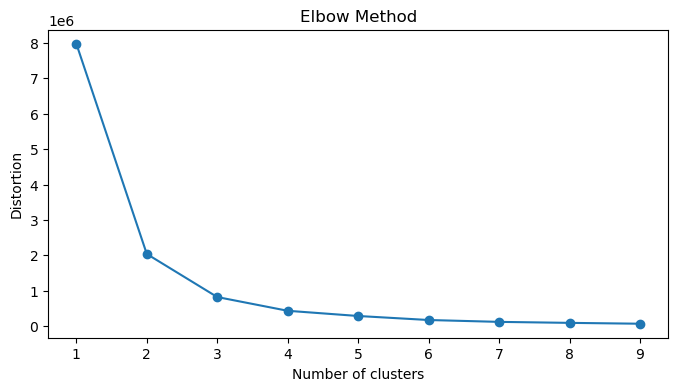

In [13]:
# Code task 16#
# Plot the inertia values against the number of clusters
distortions = [] # Empty list 
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, n_init=10, random_state=42)
    kmeans.fit(features[['Recency']])
    distortions.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(range(1, 10), distortions, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [14]:
from sklearn.cluster import KMeans

# Code task 17# 
# Initialize and fit the KMeans model
kmeans = KMeans(n_clusters=4, n_init=10, random_state=42)
kmeans.fit(features[['Recency']])

# Code task 18#
# Predict and assign clusters
features['RecencyCluster2'] = kmeans.predict(features[['Recency']])
features

,CustomerID,Revenue,TotalTransactions,AvgOrderValue,Frequency,Recency,Tenure,RecencyCluster2
0,12346.0,0.00,2,0.000000,2,142,1,3
1,12747.0,2091.40,6,38.025455,55,15,171,0
2,12748.0,9786.54,95,6.777382,1444,0,190,0
3,12749.0,782.10,2,14.483333,54,16,14,0
4,12820.0,170.46,1,15.496364,11,143,1,3
...,...,...,...,...,...,...,...,...
2565,18273.0,51.00,1,51.000000,1,74,1,1
2566,18277.0,-12.75,1,-12.750000,1,135,1,3
2567,18280.0,180.60,1,18.060000,10,94,1,3
2568,18283.0,535.05,5,2.306250,232,17,137,0


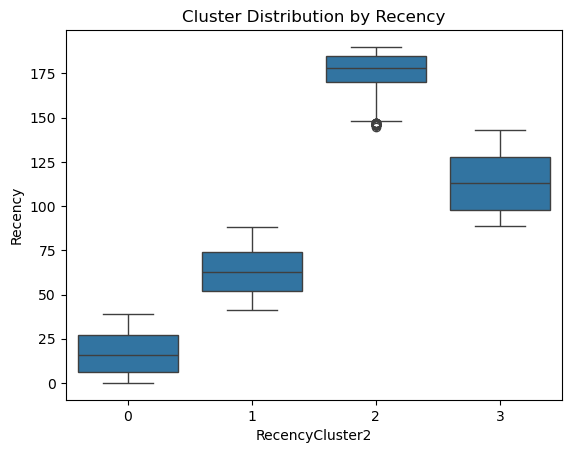

In [15]:
# Code task 19#
# Boxplot to visualize Recency distribution by cluster
sns.boxplot(x='RecencyCluster2', y='Recency', data=features)
plt.title("Cluster Distribution by Recency")
plt.show()

We will reassign the cluster numbers to ensure that higher recency values correspond to higher cluster numbers.

In [16]:
# Code task 20#
# Combine clusters 0, 1, and 3 into a single cluster labeled as 0
features['RecencyCluster2'] = features['RecencyCluster2'].replace({2:3,3: 2})

# Code task 21#
# Verify the updated clustering
print(features['RecencyCluster2'].value_counts())

RecencyCluster2
0    1170
1     641
2     451
3     308
Name: count, dtype: int64


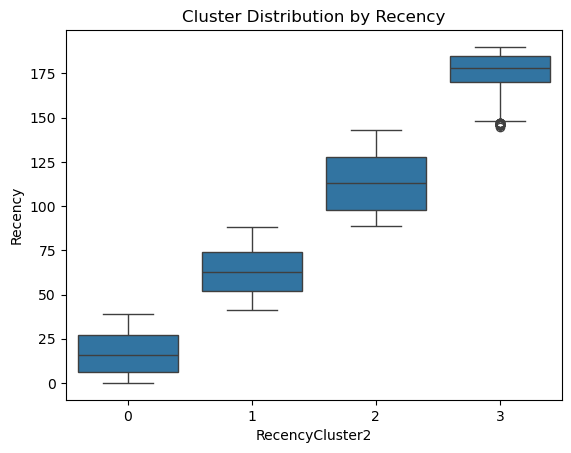

In [17]:
# Code task 22#
# Boxplot to visualize Recency distribution by cluster after correction
sns.boxplot(x='RecencyCluster2', y='Recency', data=features)
plt.title("Cluster Distribution by Recency")
plt.show()

#### 4.6.1-2.2  Create cluster for Frequency

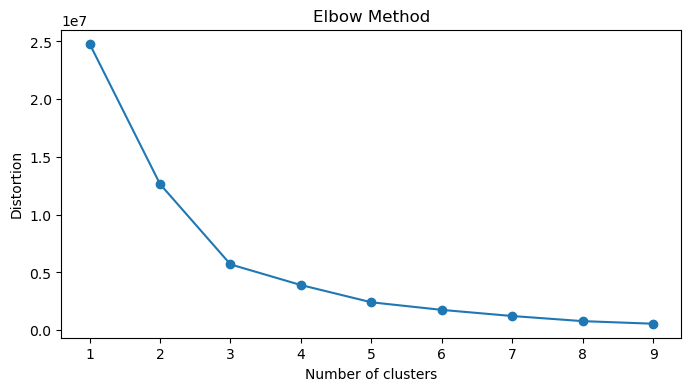

In [18]:
# Code task 23#
# Plot the inertia values against the number of clusters
distortions = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, n_init=10, random_state=42)
    kmeans.fit(features[['Frequency']])
    distortions.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(range(1, 10), distortions, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [19]:
# Code task 24#
# Initialize and fit the KMeans model
kmeans = KMeans(n_clusters=5,n_init=10, random_state=42)
kmeans.fit(features[['Frequency']])

# Code task 25#
# Predict and assign clusters
features['FrequencyCluster2'] = kmeans.predict(features[['Frequency']])
features

,CustomerID,Revenue,TotalTransactions,AvgOrderValue,Frequency,Recency,Tenure,RecencyCluster2,FrequencyCluster2
0,12346.0,0.00,2,0.000000,2,142,1,2,1
1,12747.0,2091.40,6,38.025455,55,15,171,0,1
2,12748.0,9786.54,95,6.777382,1444,0,190,0,2
3,12749.0,782.10,2,14.483333,54,16,14,0,1
4,12820.0,170.46,1,15.496364,11,143,1,2,1
...,...,...,...,...,...,...,...,...,...
2565,18273.0,51.00,1,51.000000,1,74,1,1,1
2566,18277.0,-12.75,1,-12.750000,1,135,1,2,1
2567,18280.0,180.60,1,18.060000,10,94,1,2,1
2568,18283.0,535.05,5,2.306250,232,17,137,0,0


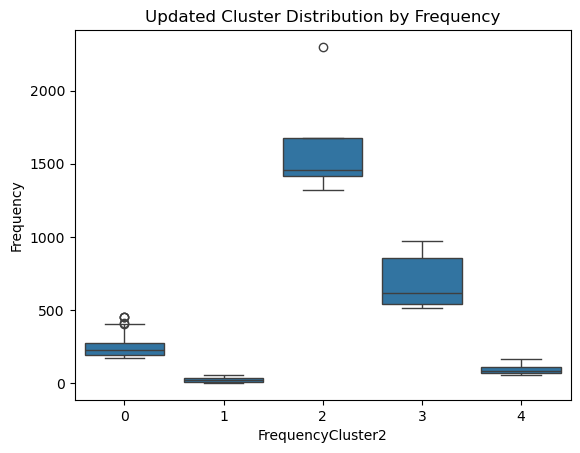

In [20]:
# Code task 26#
# Boxplot to visualize Frequency distribution by cluster
sns.boxplot(x='FrequencyCluster2', y='Frequency', data=features)
plt.title("Updated Cluster Distribution by Frequency")
plt.show()

As we have done for Recency Clusters, we will reassign the cluster numbers to ensure that higher Frequency values correspond to higher cluster numbers.

In [21]:
# Code task 27#
# Combine clusters 0, 1, and 3 into a single cluster labeled as 0
features['FrequencyCluster2'] = features['FrequencyCluster2'].replace({1:0,4:1,0:2,3:2,2:4})

# Code task 28#
# Verify the updated clustering
print(features['FrequencyCluster2'].value_counts())

FrequencyCluster2
0    1842
1     568
2     156
4       4
Name: count, dtype: int64


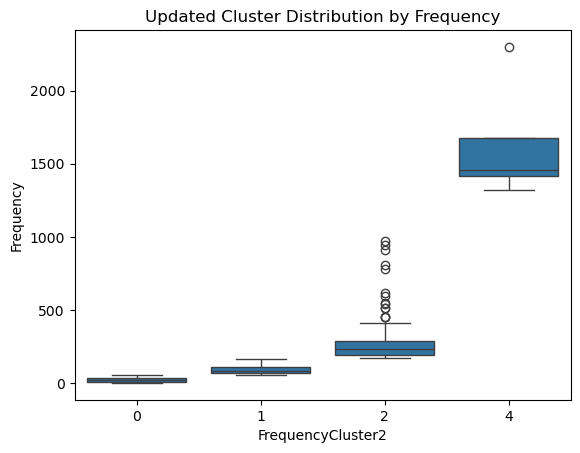

In [22]:
# Code task 29#
# Boxplot to visualize revenue distribution by cluster
sns.boxplot(x='FrequencyCluster2', y='Frequency', data=features)
plt.title("Updated Cluster Distribution by Frequency")
plt.show()

#### 4.6.1-2.3  Create cluster for Revenue

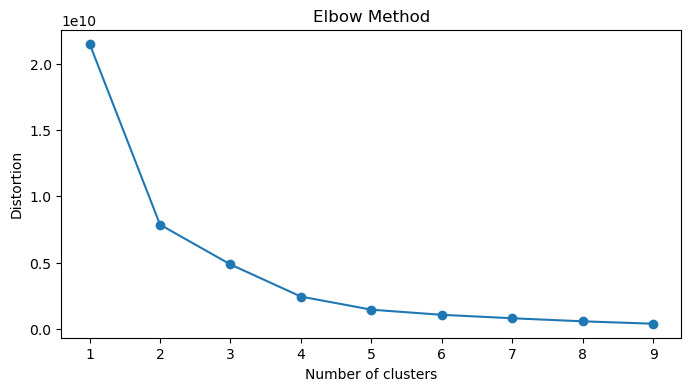

In [23]:
# Code task 30#
# Plot the inertia values against the number of clusters
distortions = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, n_init=10, random_state=42)
    kmeans.fit(features[['Revenue']])
    distortions.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(range(1, 10), distortions, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [24]:
# Code task 31#
# Initialize and fit the KMeans model
kmeans = KMeans(n_clusters=4,n_init=10, random_state=42)
kmeans.fit(features[['Revenue']])

# Code task 32#
# Predict and assign clusters
features['RevenueCluster2'] = kmeans.predict(features[['Revenue']])
features

,CustomerID,Revenue,TotalTransactions,AvgOrderValue,Frequency,Recency,Tenure,RecencyCluster2,FrequencyCluster2,RevenueCluster2
0,12346.0,0.00,2,0.000000,2,142,1,2,0,0
1,12747.0,2091.40,6,38.025455,55,15,171,0,0,0
2,12748.0,9786.54,95,6.777382,1444,0,190,0,4,2
3,12749.0,782.10,2,14.483333,54,16,14,0,0,0
4,12820.0,170.46,1,15.496364,11,143,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...
2565,18273.0,51.00,1,51.000000,1,74,1,1,0,0
2566,18277.0,-12.75,1,-12.750000,1,135,1,2,0,0
2567,18280.0,180.60,1,18.060000,10,94,1,2,0,0
2568,18283.0,535.05,5,2.306250,232,17,137,0,2,0


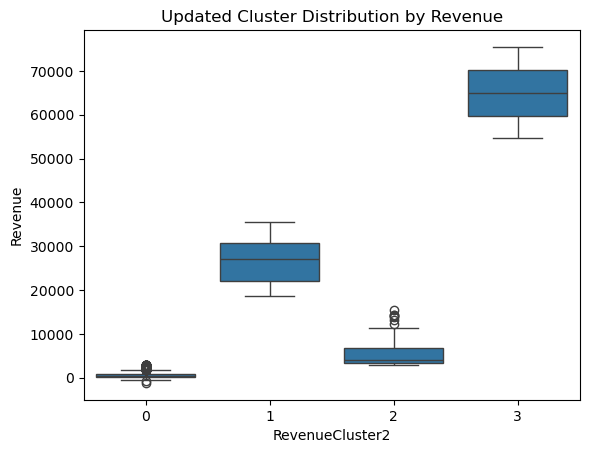

In [25]:
# Code task 33#
# Boxplot to visualize revenue distribution by cluster
sns.boxplot(x='RevenueCluster2', y='Revenue', data=features)
plt.title("Updated Cluster Distribution by Revenue")
plt.show()

In [26]:
# Code task 34#
# Combine clusters 0, 1, and 3 into a single cluster labeled as 0
features['RevenueCluster2'] = features['RevenueCluster2'].replace({1:2, 2: 1})

# Code task 35#
# Verify the updated clustering
print(features['RevenueCluster2'].value_counts())

RevenueCluster2
0    2419
1     137
2      12
3       2
Name: count, dtype: int64


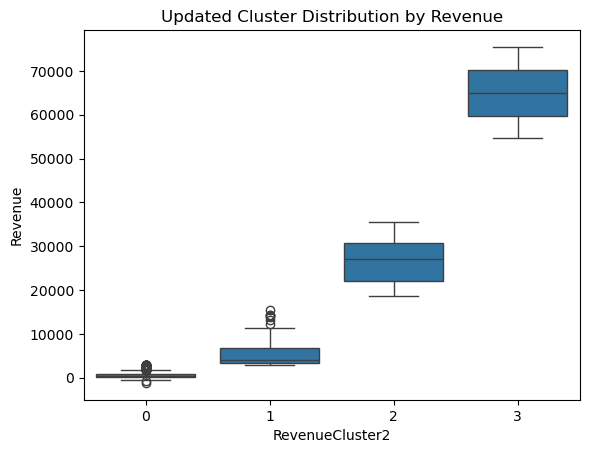

In [27]:
# Code task 35#
# Visualize the clusters after correction
sns.boxplot(x='RevenueCluster2', y='Revenue', data=features)
plt.title("Updated Cluster Distribution by Revenue")
plt.show()

In [28]:
# Code task 36#
# Create the new feature "Overall_Score" and segment it 
features['Overall_Score'] = features['RecencyCluster2'] + features['FrequencyCluster2'] + features['RevenueCluster2']
features['Segment'] = 'Low-Value'
features.loc[features['Overall_Score']>2,'Segment'] = 'Mid-Value' 
features.loc[features['Overall_Score']>4,'Segment'] = 'High-Value' 
features

,CustomerID,Revenue,TotalTransactions,AvgOrderValue,Frequency,Recency,Tenure,RecencyCluster2,FrequencyCluster2,RevenueCluster2,Overall_Score,Segment
0,12346.0,0.00,2,0.000000,2,142,1,2,0,0,2,Low-Value
1,12747.0,2091.40,6,38.025455,55,15,171,0,0,0,0,Low-Value
2,12748.0,9786.54,95,6.777382,1444,0,190,0,4,1,5,High-Value
3,12749.0,782.10,2,14.483333,54,16,14,0,0,0,0,Low-Value
4,12820.0,170.46,1,15.496364,11,143,1,2,0,0,2,Low-Value
...,...,...,...,...,...,...,...,...,...,...,...,...
2565,18273.0,51.00,1,51.000000,1,74,1,1,0,0,1,Low-Value
2566,18277.0,-12.75,1,-12.750000,1,135,1,2,0,0,2,Low-Value
2567,18280.0,180.60,1,18.060000,10,94,1,2,0,0,2,Low-Value
2568,18283.0,535.05,5,2.306250,232,17,137,0,2,0,2,Low-Value


In [29]:
# Code task 37#
# Evaluate the number of register for each segment
features['Segment'].value_counts()

Segment
Low-Value     2107
Mid-Value      457
High-Value       6
Name: count, dtype: int64

We are dealing with segments that are not well balanced.

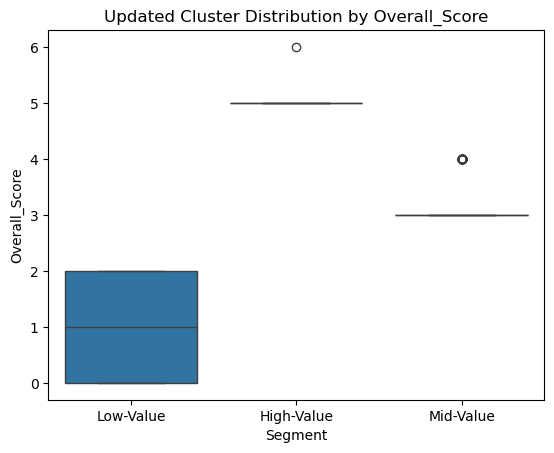

In [30]:
# Code task 38#
# Boxplot to visualize Overall_Score distribution by cluster
sns.boxplot(x='Segment', y='Overall_Score', data=features)
plt.title("Updated Cluster Distribution by Overall_Score")
plt.show()

### 4.6.2 Feature Engineering for df_feature

#### 4.6.2-1 Define the LTV in six months for each customer

In [31]:
# Code task 39#
#Target Variable - Future Revenue
future_revenue = df_target.groupby('CustomerID')['Revenue'].sum().reset_index()

# code task 40# 
# Rename the Target Variable Appropriately
future_revenue.rename(columns={'Revenue': 'Future6MonthRevenue'}, inplace=True)
future_revenue.head()

,CustomerID,Future6MonthRevenue
0,12747.0,2104.61
1,12748.0,19285.56
2,12749.0,3086.10
3,12820.0,771.88
4,12822.0,918.98


#### 4.6.2-2 Merge the two DataFrames

In [32]:
# Code 41#
# Merge target variable into features
customer_data = features.merge(future_revenue, on='CustomerID', how='left')
customer_data['Future6MonthRevenue'].fillna(0, inplace=True)
customer_data.head()

,CustomerID,Revenue,TotalTransactions,AvgOrderValue,Frequency,Recency,Tenure,RecencyCluster2,FrequencyCluster2,RevenueCluster2,Overall_Score,Segment,Future6MonthRevenue
0,12346.0,0.00,2,0.000000,2,142,1,2,0,0,2,Low-Value,0.00
1,12747.0,2091.40,6,38.025455,55,15,171,0,0,0,0,Low-Value,2104.61
2,12748.0,9786.54,95,6.777382,1444,0,190,0,4,1,5,High-Value,19285.56
3,12749.0,782.10,2,14.483333,54,16,14,0,0,0,0,Low-Value,3086.10
4,12820.0,170.46,1,15.496364,11,143,1,2,0,0,2,Low-Value,771.88


#### 4.6.2-2 Create Clusters for Future6MonthRevenue

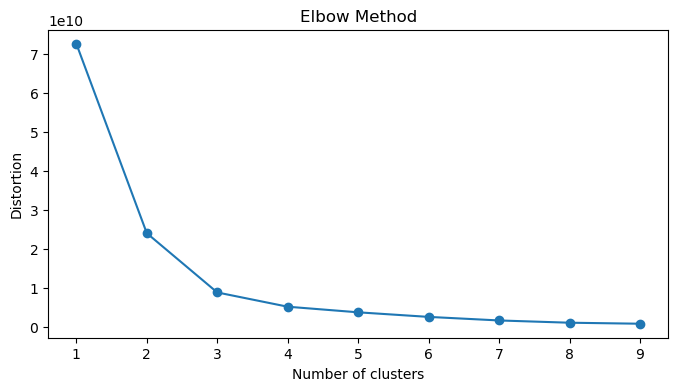

In [33]:
# Code task 42#
# Plot the inertia values against the number of clusters
distortions = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, n_init=10, random_state=42)
    kmeans.fit(customer_data[['Future6MonthRevenue']])
    distortions.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(range(1, 10), distortions, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

scaler = StandardScaler()
customer_data['ScaledRevenue'] = scaler.fit_transform(customer_data[['Future6MonthRevenue']])

In [34]:
# Code task 43#
# Initialize and fit the KMeans model
kmeans = KMeans(n_clusters=4,n_init=10, random_state=42)
kmeans.fit(customer_data[['Future6MonthRevenue']])

# Code task 44#
# Predict and assign clusters
customer_data['LTVCluster'] = kmeans.predict(customer_data[['Future6MonthRevenue']])
customer_data

,CustomerID,Revenue,TotalTransactions,AvgOrderValue,Frequency,Recency,Tenure,RecencyCluster2,FrequencyCluster2,RevenueCluster2,Overall_Score,Segment,Future6MonthRevenue,LTVCluster
0,12346.0,0.00,2,0.000000,2,142,1,2,0,0,2,Low-Value,0.00,0
1,12747.0,2091.40,6,38.025455,55,15,171,0,0,0,0,Low-Value,2104.61,0
2,12748.0,9786.54,95,6.777382,1444,0,190,0,4,1,5,High-Value,19285.56,2
3,12749.0,782.10,2,14.483333,54,16,14,0,0,0,0,Low-Value,3086.10,3
4,12820.0,170.46,1,15.496364,11,143,1,2,0,0,2,Low-Value,771.88,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2565,18273.0,51.00,1,51.000000,1,74,1,1,0,0,1,Low-Value,153.00,0
2566,18277.0,-12.75,1,-12.750000,1,135,1,2,0,0,2,Low-Value,110.38,0
2567,18280.0,180.60,1,18.060000,10,94,1,2,0,0,2,Low-Value,0.00,0
2568,18283.0,535.05,5,2.306250,232,17,137,0,2,0,2,Low-Value,1559.83,0


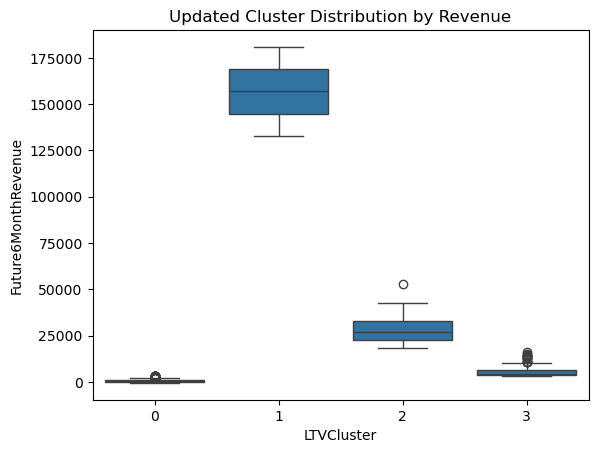

In [35]:
# Code task 45#
# Boxplot to visualize revenue distribution by cluster
sns.boxplot(x='LTVCluster', y='Future6MonthRevenue', data=customer_data)
plt.title("Updated Cluster Distribution by Revenue")
plt.show()

In [36]:
# Code task 46#
# Combine clusters 0, 1, and 3 into a single cluster labeled as 0
customer_data['LTVCluster'] = customer_data['LTVCluster'].replace({0:0,1:3,3:1})

# Code task 47#
# Verify the updated clustering
print(customer_data['LTVCluster'].value_counts())

LTVCluster
0    2379
1     170
2      19
3       2
Name: count, dtype: int64


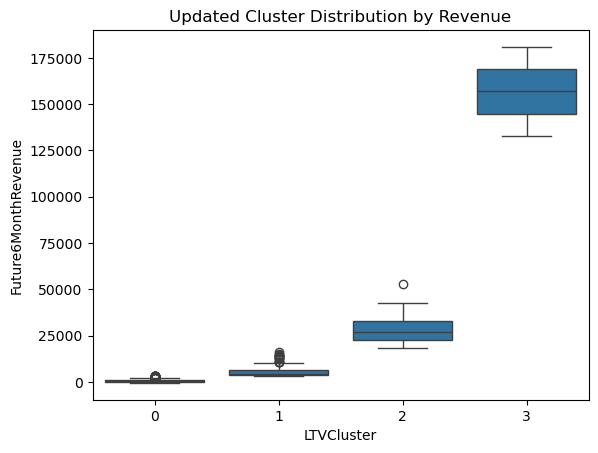

In [37]:
# Code task 48#
# Boxplot to visualize Futur6MonthRevenue distribution by cluster
sns.boxplot(x='LTVCluster', y='Future6MonthRevenue', data=customer_data)
plt.title("Updated Cluster Distribution by Revenue")
plt.show()

In [38]:
# Code 49#
#creating a new cluster dataframe
customer_cluster = customer_data.copy()

In [39]:
# Code 50#
#see details of the clusters
customer_cluster.groupby('LTVCluster')['Future6MonthRevenue'].describe()

,count,mean,std,min,25%,50%,75%,max
LTVCluster,,,,,,,,
0,2379.0,570.421501,699.714579,-609.40,0.000,312.91,905.3650,3072.00
1,170.0,5542.276176,2863.425416,3075.87,3634.170,4321.74,6227.3175,16068.45
2,19.0,29018.391579,9023.746462,18052.00,22607.050,26646.79,32771.4750,52648.96
3,2.0,156917.400000,33994.398922,132879.73,144898.565,156917.40,168936.2350,180955.07


In [40]:
# Code 51#
# Check on the new DataFrame
customer_cluster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2570 entries, 0 to 2569
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           2570 non-null   float64
 1   Revenue              2570 non-null   float64
 2   TotalTransactions    2570 non-null   int64  
 3   AvgOrderValue        2570 non-null   float64
 4   Frequency            2570 non-null   int64  
 5   Recency              2570 non-null   int64  
 6   Tenure               2570 non-null   int64  
 7   RecencyCluster2      2570 non-null   int32  
 8   FrequencyCluster2    2570 non-null   int32  
 9   RevenueCluster2      2570 non-null   int32  
 10  Overall_Score        2570 non-null   int32  
 11  Segment              2570 non-null   object 
 12  Future6MonthRevenue  2570 non-null   float64
 13  LTVCluster           2570 non-null   int32  
dtypes: float64(4), int32(5), int64(4), object(1)
memory usage: 231.0+ KB


## 4.7 Categorical Variables

### 4.7.1 Convert categorical columns to boolean values

In [41]:
# Code task 52#
# One-Hot Encode
customer_class = pd.get_dummies(customer_cluster)

In [42]:
# Code task 53#
# Visualize the five first rows after conversion
customer_class.head()

,CustomerID,Revenue,TotalTransactions,AvgOrderValue,Frequency,Recency,Tenure,RecencyCluster2,FrequencyCluster2,RevenueCluster2,Overall_Score,Future6MonthRevenue,LTVCluster,Segment_High-Value,Segment_Low-Value,Segment_Mid-Value
0,12346.0,0.00,2,0.000000,2,142,1,2,0,0,2,0.00,0,False,True,False
1,12747.0,2091.40,6,38.025455,55,15,171,0,0,0,0,2104.61,0,False,True,False
2,12748.0,9786.54,95,6.777382,1444,0,190,0,4,1,5,19285.56,2,True,False,False
3,12749.0,782.10,2,14.483333,54,16,14,0,0,0,0,3086.10,1,False,True,False
4,12820.0,170.46,1,15.496364,11,143,1,2,0,0,2,771.88,0,False,True,False


In [43]:
# Code task 53#
#calculate and show correlations
corr_matrix = customer_class.corr()
corr_matrix['LTVCluster'].sort_values(ascending=False)

LTVCluster             1.000000
RevenueCluster2        0.680915
Revenue                0.654042
Future6MonthRevenue    0.644445
TotalTransactions      0.555012
Frequency              0.416424
FrequencyCluster2      0.345228
Tenure                 0.314373
Overall_Score          0.179475
Segment_High-Value     0.169334
AvgOrderValue          0.158992
Segment_Mid-Value      0.137919
CustomerID            -0.006319
Segment_Low-Value     -0.158482
RecencyCluster2       -0.189172
Recency               -0.197934
Name: LTVCluster, dtype: float64

Best Predictors of LTVCluster:

Higher Revenue and future revenue strongly correlate with the lifetime value cluster, meaning high-LTV customers tend to generate more revenue and make more purchases.
The number of transactions and purchase frequency are also strong predictors of higher LTV.

Tenure makes sense—longer customer relationships often lead to higher lifetime value.
AvgOrderValue is a weaker predictor than TotalTransactions, suggesting that frequency of purchases matters more than order size.


## 4.8 Split the Data into Training and Test

In [45]:
# Code task 54#
# Remove the column 'CustomerID' which will not include in the model
customer_data_model = customer_class.drop(['CustomerID'], axis=1)

In [46]:
# Code task 55#
# Dependant variable or target: Future6MonthRevenue
y = customer_data_model['Future6MonthRevenue']

# Code task 56#
# Independant variables or features
X = customer_data_model.drop(['Future6MonthRevenue'], axis=1)

# Code task 57#
# Split the data in train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 4.9 Scale The Data

In [47]:
# Code task 58#
# Initialize the StandardScaler()
scaler = StandardScaler()

# Code task 59#
# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Code task 60#
# Transform the testing data 
X_test_scaled = scaler.transform(X_test)

In [48]:
print("Scaled Training Features:\n", X_train_scaled) 
print("Scaled Testing Features:\n", X_test_scaled)

Scaled Training Features:
 [[-0.24276781 -0.45380859 -0.08475949 ... -0.05410018  0.46768737
  -0.46304674]
 [ 3.82323626 12.23404224 -0.25469953 ... 18.48422751 -2.13818047
  -0.46304674]
 [-0.32591961 -0.45380859 -0.17246519 ... -0.05410018  0.46768737
  -0.46304674]
 ...
 [-0.12606564 -0.26443768 -0.1890409  ... -0.05410018  0.46768737
  -0.46304674]
 [-0.11133521 -0.26443768 -0.19375043 ... -0.05410018  0.46768737
  -0.46304674]
 [-0.07241954  0.30367504 -0.16576636 ... -0.05410018  0.46768737
  -0.46304674]]
Scaled Testing Features:
 [[-0.27230109 -0.45380859  0.00760131 ... -0.05410018  0.46768737
  -0.46304674]
 [-0.31490281 -0.45380859 -0.22451316 ... -0.05410018  0.46768737
  -0.46304674]
 [ 0.3513943  -0.07506678 -0.13027264 ... -0.05410018  0.46768737
  -0.46304674]
 ...
 [-0.23959552 -0.45380859 -0.12635915 ... -0.05410018  0.46768737
  -0.46304674]
 [-0.24123339 -0.45380859 -0.09586455 ... -0.05410018  0.46768737
  -0.46304674]
 [ 0.13725471 -0.07506678 -0.06271147 ... -0.

### The data is ready for the next steps

## 4.10 Save the datas

In [49]:
customer_class.to_csv('custommer_class.csv', index=False)
customer_data.to_csv('customer_data.csv', index=False)

In [50]:
customer_class.head()

,CustomerID,Revenue,TotalTransactions,AvgOrderValue,Frequency,Recency,Tenure,RecencyCluster2,FrequencyCluster2,RevenueCluster2,Overall_Score,Future6MonthRevenue,LTVCluster,Segment_High-Value,Segment_Low-Value,Segment_Mid-Value
0,12346.0,0.00,2,0.000000,2,142,1,2,0,0,2,0.00,0,False,True,False
1,12747.0,2091.40,6,38.025455,55,15,171,0,0,0,0,2104.61,0,False,True,False
2,12748.0,9786.54,95,6.777382,1444,0,190,0,4,1,5,19285.56,2,True,False,False
3,12749.0,782.10,2,14.483333,54,16,14,0,0,0,0,3086.10,1,False,True,False
4,12820.0,170.46,1,15.496364,11,143,1,2,0,0,2,771.88,0,False,True,False


### END